<a href="https://colab.research.google.com/github/DanielleMaas/Winc-Academy-assignments/blob/main/Global_CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
dataframe = tables[1]
dataframe.columns = ["Country", "Year_1990", "Year_2005", "Year_2017", "2017_%_of_world","2017_vs_1990_change_in_%", "2017_per_land_area", "2017_per_capita", "2018_Total_Including_LUCF", "2018_Total_Excluding_LUCF"]

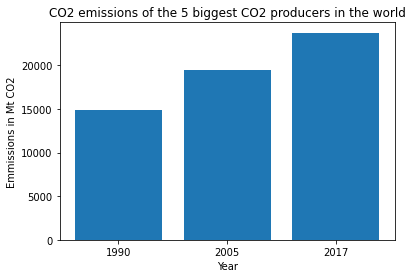

In [3]:

# The "Year" prefix was added to original dataframe, so that when a new datapoint is added to the data its column (Year_x) can be recognized and selected from the table
newdf = dataframe.loc[3: , [column for column in dataframe if column.startswith("Year") ]]

# The prefix year is replaced
newdf.columns = newdf.columns.str.replace(r"[Year_]", "", regex = True)

# Pollution in all years within dataframe for a list of top five polluters in the last year added (last column to the right in dataframe)
topfive = newdf.nlargest(5, newdf.iloc[0:0,-1:])

# Then calculating the sum for each year for all countries in the top five
topfive.loc['Total']= topfive.sum(numeric_only=True, axis=0)

# It was easier to transpose and the use the data, therefore a new dataframe was created
transposedf = topfive.transpose()
lastdf = transposedf.reset_index()

years = lastdf.loc[:, "index"]
total = lastdf.loc[:, "Total"]

plt.bar(years, total)
plt.title("CO2 emissions of the 5 biggest CO2 producers in the world")
plt.xlabel("Year")
plt.ylabel("Emmissions in Mt CO2")
plt.show()

In [108]:
newdataframe = dataframe.loc[3: , :"2017_%_of_world"]
seconddataframe = newdataframe.drop(columns=["2017_%_of_world"])
seconddataframe["Percentage_1990"] = 100
all1990 = seconddataframe.loc[1:, "Year_1990"]
all2005 = seconddataframe.loc[1:, "Year_2005"]
all2017 = seconddataframe.loc[1:, "Year_2017"]
seconddataframe["Percentage_2005"] = all2005 / all1990 * 100
seconddataframe["Percentage_2017"] = all2017 / all1990 *100
seconddataframe.sort_values(by = ["Percentage_2017"])

newdata = seconddataframe.iloc[ : , [0, 4, 5, 6]]
newdata.columns = ["Country", "1990", "2005", "2017"]
bottom3 = newdata.nlargest(3, "2017")
top3 = newdata.nsmallest(3, "2017")

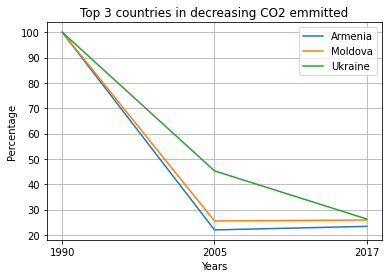

In [130]:
fig, ax = plt.subplots()

years = top3.columns[1:]
for index, row in top3.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("Top 3 countries in decreasing CO2 emmitted")
plt.xlabel("Years")
plt.ylabel("Percentage")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.grid()
plt.legend()
plt.show()

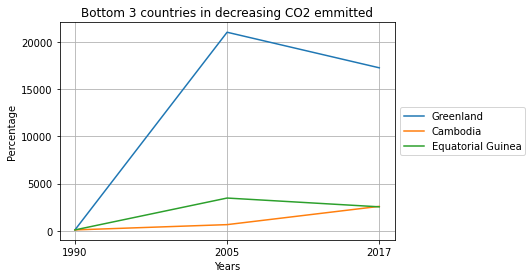

In [111]:
fig, ax = plt.subplots()

years = bottom3.columns[1:]
for index, row in bottom3.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("Bottom 3 countries in decreasing CO2 emmitted")
plt.xlabel("Years")
plt.ylabel("Percentage")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.grid()

plt.show()

In [125]:
#Last part of assignment
# now create the same chart for all countries that had at least five Mt of CO2 emissions in 1990. 

lastdataframe = newdataframe.loc[(seconddataframe.Year_1990 > 5)]
thirddataframe = lastdataframe.drop(columns=["2017_%_of_world"])
thirddataframe["Percentage_1990"] = 100
all19902 = thirddataframe.loc[1:, "Year_1990"]
all20052 = thirddataframe.loc[1:, "Year_2005"]
all20172 = thirddataframe.loc[1:, "Year_2017"]
thirddataframe["Percentage_2005"] = all20052 / all19902 * 100
thirddataframe["Percentage_2017"] = all20172 / all19902 *100
thirddataframe.sort_values(by = ["Percentage_2017"])

newdata2 = thirddataframe.iloc[ : , [0, 4, 5, 6]]
newdata2.columns = ["Country", "1990", "2005", "2017"]
newbottom3 = newdata2.nlargest(3, "2017")

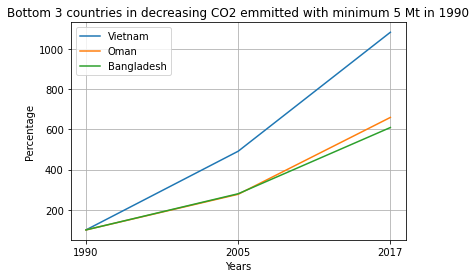

In [129]:
fig, ax = plt.subplots()

years = newbottom3.columns[1:]
for index, row in newbottom3.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("Bottom 3 countries in decreasing CO2 emmitted with minimum 5 Mt in 1990")
plt.xlabel("Years")
plt.ylabel("Percentage")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.grid()
plt.legend()
plt.show()